In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import os
import imageio

### Forma 1 Descenso de Gradiente

In [6]:
# Semilla para reproducibilidad
np.random.seed(42)

# Generar 500 puntos aleatorios 
X = np.random.uniform(-100, 100, 500)
# Generar y con una relación lineal
y = 2.5 * X + np.random.normal(0, 50, 500)

# Inicializar parámetros
m, c = 0.0, 0.0
learning_rate = 0.00005
iterations = 200
n = len(X)

# Carpeta para imágenes
os.makedirs("frames_dispersos_lentos", exist_ok=True)
image_paths = []

# Gradient Descent y guardar imagen en cada iteración
for i in range(iterations):
    y_pred = m * X + c
    error = y - y_pred
    dm = (-2 / n) * np.sum(error * X)
    dc = (-2 / n) * np.sum(error)
    m -= learning_rate * dm
    c -= learning_rate * dc

    plt.figure(figsize=(10, 6))
    plt.scatter(X, y, s=8, alpha=0.5, color="blue", label="Datos")
    sorted_X = np.sort(X)
    plt.plot(sorted_X, m * sorted_X + c, color="red", label=f"Iteración {i}")
    plt.title("Gradiente Descente con Datos Dispersos (-100 a 100)")
    plt.xlabel("X")
    plt.ylabel("y")
    plt.legend()
    plt.grid(True)
    filename = f"frames_dispersos_lentos/iter_{i:03d}.png"
    plt.savefig(filename)
    image_paths.append(filename)
    plt.close()

# Crear GIF muy lento (1 segundo por frame)
images = [imageio.imread(path) for path in image_paths]
imageio.mimsave("gradient_descent_dispersos_lento.gif", images, duration=1.0, loop=0)



C:\Users\Usuario\AppData\Local\Temp\ipykernel_17424\1071050179.py:43: DeprecationWarning: Starting with ImageIO v3 the behavior of this function will switch to that of iio.v3.imread. To keep the current behavior (and make this warning disappear) use `import imageio.v2 as imageio` or call `imageio.v2.imread` directly.
  images = [imageio.imread(path) for path in image_paths]


### Forma 2 Ecuación Normal

Parámetros obtenidos: m = 2.56, c = 0.40


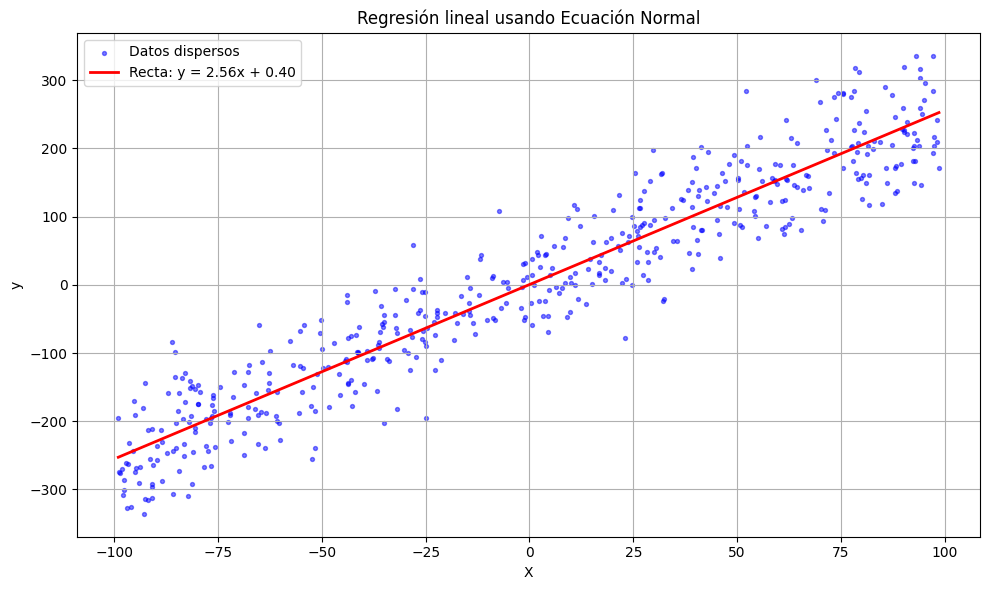

In [ ]:
# Generar datos
np.random.seed(42)
X = np.random.uniform(-100, 100, 500)
y = 2.5 * X + np.random.normal(0, 50, 500)

# Construir matriz X_b
X_b = np.c_[np.ones((len(X), 1)), X]

# Ecuación normal: theta
theta = np.linalg.inv(X_b.T @ X_b) @ X_b.T @ y
c, m = theta[0], theta[1]

print(f"Parámetros obtenidos: m = {m:.2f}, c = {c:.2f}")

# Grafic
plt.figure(figsize=(10, 6))
plt.scatter(X, y, s=8, alpha=0.5, color="blue", label="Datos dispersos")
sorted_X = np.sort(X)
plt.plot(sorted_X, m * sorted_X + c, color="red", linewidth=2, label=f"Recta: y = {m:.2f}x + {c:.2f}")
plt.title("Regresión lineal usando Ecuación Normal")
plt.xlabel("X")
plt.ylabel("y")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

### Forma 3 Sklearn 

Parámetros con sklearn: m = 2.5575011557228606, c = 0.3975332464392898


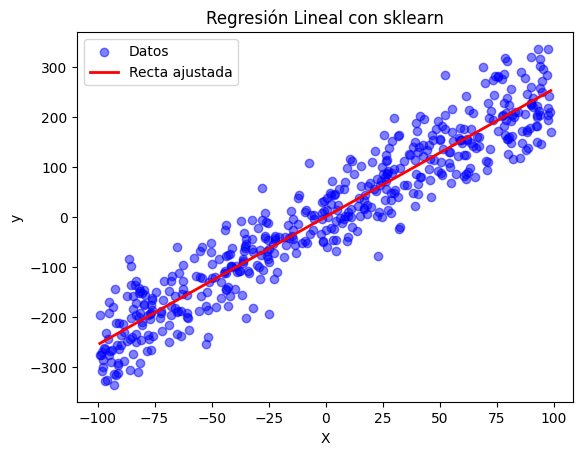

In [ ]:
from sklearn.linear_model import LinearRegression


# Generar datos
np.random.seed(42)
X = np.random.uniform(-100, 100, 500).reshape(-1, 1)  # reshape para sklearn
y = 2.5 * X.flatten() + np.random.normal(0, 50, 500)

# Modelo
model = LinearRegression()
model.fit(X, y)

m = model.coef_[0]
c = model.intercept_

print(f"Parámetros con sklearn: m = {m}, c = {c}")

# Visualización
plt.scatter(X, y, color='blue', alpha=0.5, label='Datos')
x_line = np.linspace(X.min(), X.max(), 100).reshape(-1, 1)
y_line = model.predict(x_line)
plt.plot(x_line, y_line, color='red', linewidth=2, label='Recta ajustada')

plt.xlabel('X')
plt.ylabel('y')
plt.title('Regresión Lineal con sklearn')
plt.legend()
plt.show()